In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import subprocess

import common


In [2]:
df = common.run_benchmark(args="--ray_offset 0.2")
df = df.set_index("n_rays")

# claculate rays per secon
df_rps = pd.DataFrame()
df_rps["rps_ovdb"] = df.index / df["time_ovdb"]
df_rps["rps_nvdb_cpu"] = df.index /df["time_nvdb_cpu"] 
df_rps["rps_nvdb_gpu"] = df.index / df["time_nvdb_gpu"]
df_rps

/home/hiti/Workspace/SelectedTopicsCompElectronics/build/src/raytracing --ray_offset 0.2
Running benchmark with --ray_offset 0.2
0.203: Running OpenVDB benchmark for 16 Rays
0.203: OpenVDB Finished in 5.8691e-05s (272.614 kRays/s)
0.203: NanoVDB on CPU Finished in 0.000125097s (127.901 kRays/s)
0.206: NanoVDB on GPU Finished in 0.000355784s (0.0449711 MRays/s)
0.207: Done

0.207: Running OpenVDB benchmark for 34 Rays
0.207: OpenVDB Finished in 7.8599e-05s (432.575 kRays/s)
0.207: NanoVDB on CPU Finished in 6.0624e-05s (560.834 kRays/s)
0.210: NanoVDB on GPU Finished in 0.00107154s (0.03173 MRays/s)
0.210: Done

0.210: Running OpenVDB benchmark for 76 Rays
0.210: OpenVDB Finished in 0.000160875s (472.416 kRays/s)
0.210: NanoVDB on CPU Finished in 9.3266e-05s (814.874 kRays/s)
0.213: NanoVDB on GPU Finished in 0.000390249s (0.194747 MRays/s)
0.213: Done

0.213: Running OpenVDB benchmark for 165 Rays
0.213: OpenVDB Finished in 0.000224295s (735.638 kRays/s)
0.213: NanoVDB on CPU Finished 

,rps_ovdb,rps_nvdb_cpu,rps_nvdb_gpu
n_rays,,,
16,2.726142e+05,1.279007e+05,4.497111e+04
34,4.325755e+05,5.608340e+05,3.173003e+04
76,4.724165e+05,8.148736e+05,1.947475e+05
165,7.356383e+05,1.323324e+06,2.900140e+05
362,1.019365e+06,1.684528e+06,6.378124e+05
789,1.113458e+06,1.952893e+06,8.036014e+05
1722,1.091137e+06,1.916353e+06,3.169700e+06
3756,1.102426e+06,1.627143e+06,7.765192e+06
8192,1.032153e+06,2.078191e+06,1.876760e+07


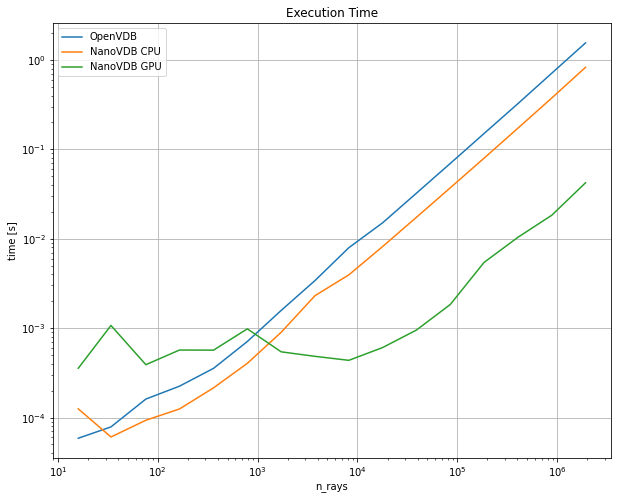

In [3]:
plt.rcParams["figure.figsize"] = (10, 8)

cols = ["time_ovdb", "time_nvdb_cpu", "time_nvdb_gpu"]
cols_names = ["OpenVDB", "NanoVDB CPU", "NanoVDB GPU"]


df.plot(y=cols)
plt.legend()
plt.grid()
plt.legend(cols_names)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("time [s]")
plt.title("Execution Time")
plt.show()


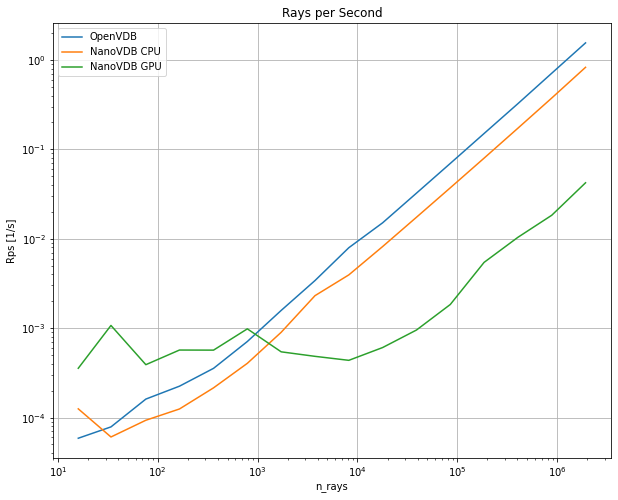

In [4]:
plt.rcParams["figure.figsize"] = (10, 8)

cols = ["rps_ovdb", "rps_nvdb_cpu", "rps_nvdb_gpu"]
cols_names = ["OpenVDB", "NanoVDB CPU", "NanoVDB GPU"]


df.plot()
plt.legend()
plt.grid()
plt.legend(cols_names)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Rps [1/s]")
plt.title("Rays per Second")
plt.show()

Text(0.5, 1.0, 'Relative Speed-Up for 1923096 rays (OpenVDB=1)')

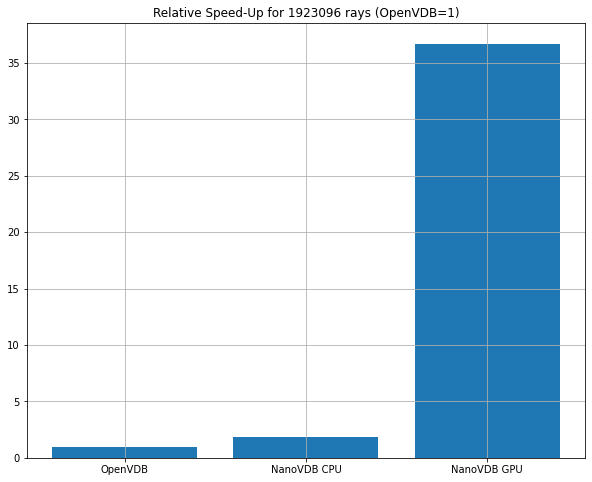

In [5]:
series = df_rps.iloc[-1]
series = series * 1/ series.nsmallest(1)[0]
n_rays = df_rps.index[-1]

plt.bar(cols_names, series.values)
plt.grid()
plt.title(f"Relative Speed-Up for {n_rays} rays (OpenVDB=1)")